In [3]:
import mingus.core.chords as chords
import mingus.core.notes as notes
import mingus.core.intervals as intervals
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd

In [4]:
all_notes = lambda : map(notes.int_to_note, range(12))

In [5]:
list(all_notes())

['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

In [15]:
intervals.major_sixth("E")

'C#'

In [6]:
def normalize(note):
    return notes.int_to_note(notes.note_to_int(note))

def transform(chord):
    (root, third, fifth, seventh) = chord
    new_third = normalize(notes.diminish(seventh))
    new_seventh = third
    root_candidates = [
        intervals.major_sixth(new_third),
        intervals.minor_sixth(new_third),
    ]

    for new_root, new_fifth in it.permutations(all_notes(), 2):
        new_chord = [new_root, new_third, new_fifth, new_seventh]
        #print(new_chord)
        names = chords.determine(new_chord, shorthand=True, no_polychords=True)
        for name in names:
            yield name

In [7]:
edges = []
queue = ["Dm7"]
solved = set()
while len(queue) > 0:
    chord = queue.pop()
    solved.add(chord)
    chord_notes = chords.from_shorthand(chord)
    for new_chord in transform(chord_notes):
        print(f"{chord} -> {new_chord}")
        if new_chord not in solved:
            queue.append(new_chord)
            edges.append((chord, new_chord))

Dm7 -> G7
Dm7 -> Gm7+
Dm7 -> G#dim7
Dm7 -> Dm6
Dm7 -> Bm7b5
Dm7 -> B7b5
B7b5 -> EM7
B7b5 -> G#sus47
B7b5 -> BM6
B7b5 -> G#m7
B7b5 -> G#sus4b9
G#sus4b9 -> D#sus47
G#sus4b9 -> AM7
G#sus4b9 -> C#m6
G#sus4b9 -> A#m7b5
G#sus4b9 -> EM6
G#sus4b9 -> C#m7
G#sus4b9 -> C#sus4b9
G#sus4b9 -> C#sus47
C#sus4b9 -> G#sus47
C#sus4b9 -> DM7
C#sus4b9 -> F#m6
C#sus4b9 -> D#m7b5
C#sus4b9 -> AM6
C#sus4b9 -> F#m7
C#sus4b9 -> DM7+
C#sus4b9 -> F#M6
C#sus4b9 -> D#m7
C#sus4b9 -> F#7
C#sus4b9 -> F#sus47
C#sus4b9 -> F#sus4b9
F#sus4b9 -> C#sus47
F#sus4b9 -> GM7
F#sus4b9 -> Bm6
F#sus4b9 -> G#m7b5
F#sus4b9 -> DM6
F#sus4b9 -> Bm7
F#sus4b9 -> Bm/M7
F#sus4b9 -> GM7+
F#sus4b9 -> BM6
F#sus4b9 -> G#m7
F#sus4b9 -> B7
F#sus4b9 -> BM7
F#sus4b9 -> Bsus4b9
F#sus4b9 -> Bsus47
Bsus47 -> D#sus4b9
D#sus4b9 -> G#sus47
D#sus4b9 -> G#sus4b9
D#sus4b9 -> EM7
D#sus4b9 -> BM6
D#sus4b9 -> G#m7
G#m7 -> G7
G#m7 -> G#dim7
G#m7 -> Dm6
G#m7 -> Bm7b5
G#m7 -> Gm7+
G#m7 -> B7b5
Gm7+ -> CM7
Gm7+ -> CM7+
Gm7+ -> F#sus47
Gm7+ -> C#m7b5
Gm7+ -> Em6
Gm7

In [33]:
g = nx.DiGraph()
g.add_edges_from(edges)

In [34]:
non_terminating_nodes = [node for node in g.nodes if g.out_degree(node) > 0]
terminating_nodes = [node for node in g.nodes if g.out_degree(node) == 0]
# for chord in terminating_nodes:
#     g.remove_node(chord)

In [35]:
def draw_graph(G, ax, positions, rad=0.1, **options):
    nx.draw_networkx(G, pos=positions, ax=ax, connectionstyle=f"arc3,rad={rad}", **options)

In [36]:
def tsne_layout(g):
    g_matrix = nx.laplacian_matrix(g).todense()
    tsne = TSNE()
    g_2d = tsne.fit_transform(g_matrix)
    return {node: g_2d[k] for (k, node) in enumerate(g.nodes())}


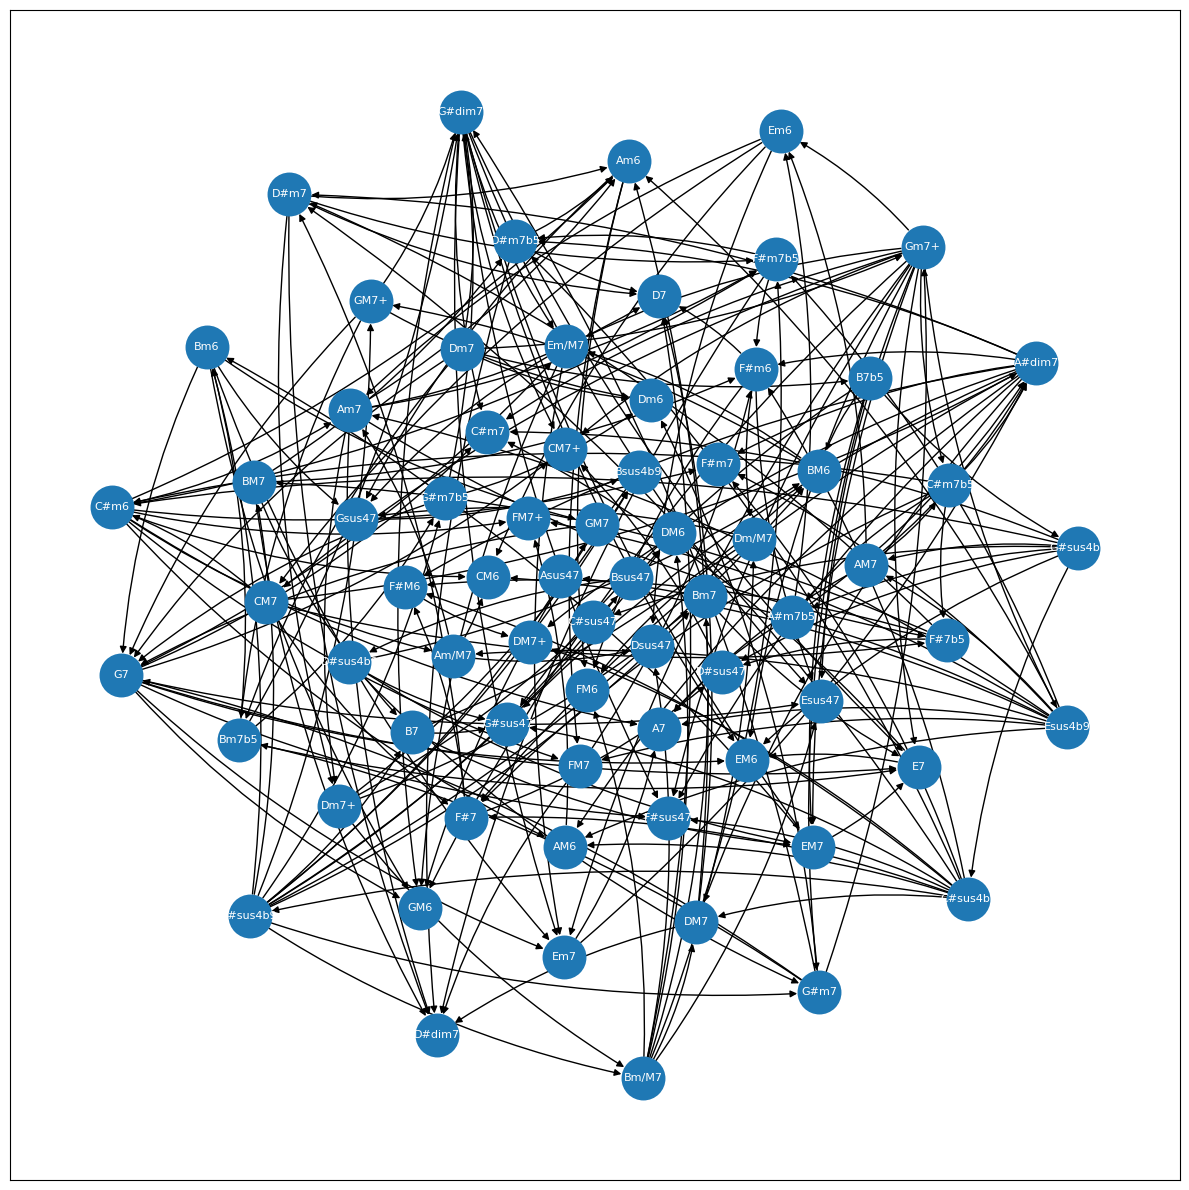

In [37]:
fig, ax = plt.subplots(figsize=(12, 12))
options = {
    "font_size": 8,
    "font_color": "white",
    "node_size": 1000,
    "linewidths": 0,
    "width": 1,
}



pos = tsne_layout(g.to_undirected())
# pos = nx.spring_layout(
#     g.to_undirected(), pos=pos, iterations=1000, seed=42, fixed=["Dm7", "G7", "CM7"]
# )
draw_graph(g, ax, pos, **options)
fig.tight_layout()

In [38]:
start = "Dm7"
for m1 in transform(chords.from_shorthand(start)):
    for m2 in transform(chords.from_shorthand(m1)):
        for m3 in transform(chords.from_shorthand(m2)):
            if "CM7" in {m1, m2, m3}:
                print(" -> ".join([start, m1, m2, m3]))
        


Dm7 -> G7 -> CM7 -> F#7b5
Dm7 -> G7 -> CM7 -> F#7
Dm7 -> G7 -> CM7 -> A#dim7
Dm7 -> G7 -> CM7 -> C#m6
Dm7 -> G7 -> CM7 -> A#m7b5
Dm7 -> G7 -> Em6 -> CM7
Dm7 -> Gm7+ -> CM7 -> F#7b5
Dm7 -> Gm7+ -> CM7 -> F#7
Dm7 -> Gm7+ -> CM7 -> A#dim7
Dm7 -> Gm7+ -> CM7 -> C#m6
Dm7 -> Gm7+ -> CM7 -> A#m7b5
Dm7 -> Gm7+ -> Em6 -> CM7
Dm7 -> G#dim7 -> CM7 -> F#7b5
Dm7 -> G#dim7 -> CM7 -> F#7
Dm7 -> G#dim7 -> CM7 -> A#dim7
Dm7 -> G#dim7 -> CM7 -> C#m6
Dm7 -> G#dim7 -> CM7 -> A#m7b5
Dm7 -> G#dim7 -> Em6 -> CM7
Dm7 -> Bm7b5 -> G#dim7 -> CM7


In [40]:
start = "Dm7"
end = "GM7"
for path in nx.all_simple_edge_paths(g, start, end):
    path_str = " -> ".join([left_node for left_node, _ in path] + [end])
    print(path_str)

Dm7 -> Gm7+ -> CM7 -> F#7b5 -> BM7 -> B7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> G#m7b5 -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am7 -> F#7b5 -> BM7 -> B7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am7 -> F#7b5 -> BM7 -> B7 -> BM6 -> GM7+ -> Bm7b5 -> G#m7b5 -> G#dim7 -> EM7 -> Bm6 -> GM7
Dm7 -> Gm7+ -> CM7 -> C#m6 -> Am/M7 -> Am7 -> F#7b5 -> BM7 -> B7 